<a href="https://colab.research.google.com/github/gitnicolas343/python_estudio/blob/main/sql_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 📘 ¿Qué es una base de datos?

Una **base de datos** es un sistema organizado para **almacenar datos de forma persistente**, incluso después de que finalice la ejecución del programa. A diferencia de un diccionario en memoria, una base de datos se guarda en **almacenamiento permanente**, permitiendo manejar **volúmenes mucho mayores de información**.

* Funciona de forma similar a un diccionario: almacena **pares clave-valor**.
* Utiliza **índices** para acelerar la inserción y consulta de datos, incluso a gran escala.
* Soporta acceso rápido y eficiente a grandes cantidades de información.

### 🛠️ Sistemas de gestión de bases de datos (DBMS)

Existen diversos DBMS para distintos usos. Algunos ejemplos comunes incluyen:

* **Oracle**
* **MySQL**
* **Microsoft SQL Server**
* **PostgreSQL**
* **SQLite** (enfocado en este proyecto)

### 🧩 ¿Por qué SQLite?

* **Ligero** y **embebido**: ideal para aplicaciones pequeñas o integradas.
* **Sin necesidad de servidor**.
* Viene **integrado con Python**, lo que facilita su uso en proyectos de análisis de datos.
* Utilizado por aplicaciones reales como **Firefox** y muchas otras.

SQLite es una excelente opción para prácticas de manipulación de datos en ciencia de datos, como en aplicaciones de seguimiento o análisis de redes sociales.

---







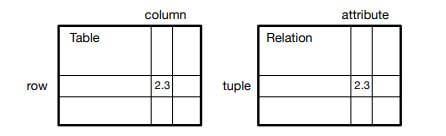


---

### 🧱 Estructura de una base de datos

Una base de datos puede visualizarse como una **hoja de cálculo con varias hojas**. Sus elementos fundamentales son:

* **Tablas**: estructuras que almacenan datos.
* **Filas (registros)**: cada fila representa una unidad de información.
* **Columnas (campos)**: definen los atributos de cada registro.

🔎 En el contexto de bases de datos relacionales:

* Tabla → **Relación**
* Fila → **Tupla**
* Columna → **Atributo**

Usaremos los términos comunes (tabla, fila, columna) en lugar de los formales.

---

### 🧭 Navegador de bases de datos para SQLite

Aunque este cuaderno usará **Python + SQLite**, también es útil conocer el uso de herramientas visuales como el **[Database Browser for SQLite](http://sqlitebrowser.org/)**.

Este software permite de forma visual:

* Crear y modificar **tablas**
* Insertar o editar **datos**
* Ejecutar **consultas SQL**

📌 **Analogía**:
Usar el navegador es como abrir un archivo de texto en un editor para pequeños cambios. Para tareas repetitivas o complejas, **Python** resulta más práctico.

🛠️ Creación de una tabla en SQLite
En SQLite (y en bases de datos relacionales en general), las tablas requieren una estructura definida desde el inicio. Esto implica:

Especificar el nombre de cada columna.

Declarar el tipo de dato que contendrá cada columna (por ejemplo: TEXT, INTEGER, REAL).

🔍 Esto permite al motor de la base de datos optimizar el almacenamiento y la búsqueda, lo cual es clave cuando trabajamos con grandes volúmenes de datos.

👉 Puedes consultar los tipos de datos soportados por SQLite en: https://www.sqlite.org/datatypes.html

In [9]:
import sqlite3

conn = sqlite3.connect('musica.sqlite')                                     #realiza una conexion con el archivo musica, si no existe se creara
cur  =  conn.cursor()                                                       #un cursor es un manejador de archivos y se puede
                                                                            #usar para realizar operaciones de los datos almacenados en la base de datos
                                                                            #ejecutamos sobre la base de datos
cur.execute('DROP TABLE IF EXISTS canciones')                               #este comando elimina la base de datos si existe

cur.execute('CREATE TABLE canciones (titulo TEXT, reproducciones INTEGER)')
conn.close()

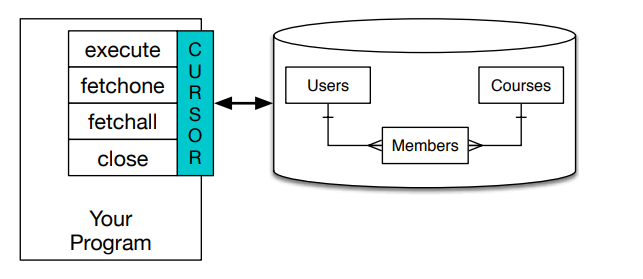

🧾 **SQL: Lenguaje de Consulta Estructurado**
Los comandos que usamos para interactuar con una base de datos se expresan en SQL (Structured Query Language), un lenguaje estandarizado que funciona en la mayoría de los sistemas de bases de datos.

📌 **Convenciones en SQL:**

Las palabras clave del lenguaje se escriben en mayúsculas (CREATE, DROP, INSERT, etc.).

Los nombres de tablas y columnas definidos por el usuario se escriben normalmente en minúsculas.

🔗 Más información: Wikipedia - SQL

💣 **Eliminar una tabla (si existe)**
Antes de crear una tabla, se acostumbra eliminarla si ya existe. Esto evita errores si ejecutamos varias veces el mismo script.

⚠️ **Importante:** DROP TABLE elimina la tabla y todos sus datos, sin posibilidad de deshacer.


🎶 **Inserción de datos en una tabla SQLite**
Una vez creada una tabla, se pueden almacenar registros en ella usando el comando INSERT de SQL.

📌 **Sintaxis básica:**
sql
Copiar
Editar
INSERT INTO nombre_tabla (columna1, columna2) VALUES (valor1, valor2)
Para mayor seguridad y legibilidad en Python, se utilizan signos de interrogación ? como marcadores de posición, y los valores reales se pasan en forma de tupla como segundo argumento a execute().


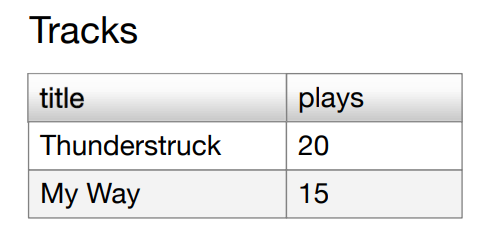

In [10]:
import sqlite3
conn = sqlite3.connect('musica.sqlite')
cur = conn.cursor()

cur.execute('INSERT INTO canciones (titulo, reproducciones) VALUES (?,?)',('thunderstruck',20)) #primero insertamos INSERT dos filas en la tabla
cur.execute('INSERT INTO canciones (titulo,reproducciones) VALUES(?,?)',('My Way',15))
conn.commit()                                                                                   #insertamos commit para sobresescribir la base de datos

In [11]:
print('Canciones:')
cur.execute('SELECT titulo, reproducciones FROM  canciones')   #se indican las columnas que queremos obtener  se comvierte en un odjeto iterable
for fila in cur:
    print(fila)

Canciones:
('thunderstruck', 20)
('My Way', 15)


In [12]:
cur.execute('DELETE FROM canciones WHERE reproducciones < 100')   #dejamos todo lo que hicimos , WHERE nos permite dar un parametro condicional
conn.commit()                                                     #llamamos de nuevo a commit() para forzar a los datos a ser eliminados de la base de datos.
cur.close()


# Lenguaje de Consultas Estructurado (SQL)
SQL (Structured Query Language) es un lenguaje estándar para interactuar con bases de datos relacionales.

Las bases de datos relacionales están compuestas por tablas, que contienen filas (registros) y columnas (campos) con tipos de datos como texto, números o fechas.



*   **Para crear una tabla:**
CREATE TABLE Canciones (titulo TEXT, reproducciones INTEGER)
*   **Para insertar datos:**
INSERT INTO Canciones (titulo, reproducciones) VALUES ('My Way', 15)


*   Para consultar datos:
SELECT titulo, reproducciones FROM Canciones
*   Se puede agregar:


1.   WHERE para filtrar filas.
2.   ORDER BY para ordenar los resultados.

SQL permite trabajar con distintas bases de datos de manera consistente gracias a su estandarización.


#🔍 Selección de datos

1. SELECT * FROM Canciones WHERE titulo = 'My Way'

* selecciona todas las columnas.

2. WHERE usa = (no == como en Python).

* Permite operadores: <, >, <=, >=, !=, AND, OR, ().

# 🗂 Ordenar resultados

3. SELECT titulo, reproducciones FROM Canciones ORDER BY titulo

* Ordena los resultados por una columna.

#❌ Eliminar datos

4. DELETE FROM Canciones WHERE titulo = 'My Way'

* DELETE elimina filas que cumplen una condición.

#✏️ Actualizar datos

5. UPDATE Canciones SET reproducciones = 16 WHERE titulo = 'My Way'

* UPDATE modifica columnas con SET.

Si no se usa WHERE, se actualizan todas las filas.

#🔄 Operaciones CRUD en SQL:

* Create → INSERT

* Read → SELECT

* Update → UPDATE

* Delete → DELETE

Estos cuatro comandos son esenciales para manipular datos en bases de datos relacionales.

In [13]:
#ejemplos

conn   = sqlite3.connect('musica.sqlite')  #me conecto a la base de datos
cur = conn.cursor()                        #abrimos un cursor

#insertamos canciones
cur.execute("INSERT INTO canciones (titulo,reproducciones) VALUES (?,?)",('My Way',15))
cur.execute("INSERT INTO canciones (titulo,reproducciones) VALUES (?,?)",('Imagine',22))
cur.execute("INSERT INTO canciones (titulo,reproducciones) VALUES (?,?)",('Hay jude',18))
conn.commit()


cur.execute('SELECT * FROM canciones')    #ejecutamos la selccion de todo
print(cur.fetchall())

[('My Way', 15), ('Imagine', 22), ('Hay jude', 18)]


In [14]:
#consultas sencillas

#consuta por nombre
for fila in cur.execute("SELECT * FROM canciones WHERE titulo = 'My Way'"):      #consultar en la tabla creada todas las canciones que tengan como titulo My Way
    print(fila)


('My Way', 15)


In [15]:
# Ordenar por título
for fila in cur.execute("SELECT titulo, reproducciones FROM canciones ORDER BY titulo"):   #se ordena por orden alfabetico
    print(fila)

('Hay jude', 18)
('Imagine', 22)
('My Way', 15)


In [16]:
#actualizar r

# Actualizar reproducciones de 'My Way'
cur.execute("UPDATE Canciones SET reproducciones = 16 WHERE titulo = 'My Way'")
conn.commit()

# Verificar cambio
print("\n✏️ Canción actualizada:")
for fila in cur.execute("SELECT * FROM Canciones WHERE titulo = 'My Way'"):
    print(fila)


✏️ Canción actualizada:
('My Way', 16)


#EJEMPLO: EXTRACCION DE CORREOS

este archivo txt contiene correos con sus destinatarios la tarea es sacar los destinatarios y los correos en una tabla de sql y mostrarla.

In [17]:
import sqlite3

conn = sqlite3.connect('emaildb.sqlite')                                                #nos conectamos a la base de datos
cur = conn.cursor()                                                                     #iniciamos cursor



cur.execute('''DROP TABLE IF EXISTS counts''')                                           #borramos las tablas si no existen
cur.execute('''CREATE TABLE counts (email TEXT , count INTEGER)''')                     #creamos la tabla con 2 columnas



fname  = 'mbox-short.txt'                                                               #definimos el nombre del archivo
fh = open(fname)                                                                        #abrimos el archivo nativo de python




for line in fh:                                                                         #itearmos sobre las lineas
    if not line.startswith('From: '):continue                                           #si no encuentra 'From:' SALTAR
    pieces = line.split()                                                               #cortamos la linea en una lista de str
    email = pieces[1]                                                                   #escogemos la primera
    cur.execute('SELECT count FROM counts WHERE email = ?', (email,))                   #seleccionamos la columna count , agrgamos email
    row = cur.fetchone()                                                                #estas dos lineas verifican la existencia del correo en la base de datos
    if row is None:
        cur.execute('''INSERT INTO counts (email, count) VALUES (?,1)''',(email,))      #si row es none es la primera vez que ve este correo usa el email como clave y emplieza el contador en 1
    else:
        cur.execute('''UPDATE counts SET count  = count + 1 WHERE email = ?''',(email,))#sino actualiza el contador en lo que hau en count +1
    conn.commit()



for row in cur.execute('SELECT email,count FROM counts ORDER BY count DESC'):           #consultamos los documentos
    print(str(row[0]),row[1])                                                           #imprimimos





cwen@iupui.edu 5
zqian@umich.edu 4
david.horwitz@uct.ac.za 4
louis@media.berkeley.edu 3
gsilver@umich.edu 3
stephen.marquard@uct.ac.za 2
rjlowe@iupui.edu 2
wagnermr@iupui.edu 1
antranig@caret.cam.ac.uk 1
gopal.ramasammycook@gmail.com 1
ray@media.berkeley.edu 1


## **EJEMPLO PRACTICO**

#🐦 Rastreo en Twitter usando una Base de Datos (Web Crawler)

Este ejemplo implementa un programa araña que navega por cuentas de Twitter, recuperando datos y almacenándolos localmente en una base de datos. Se utiliza la API de Twitter para obtener información sobre cuentas y sus amigos (followers o following).

1. **🧩 Motivación:**
* Permite interrumpir y reanudar el rastreo sin perder datos.

* Se evita volver a empezar desde cero tras cada ejecución.

* El almacenamiento local facilita el análisis progresivo y persistente.

2. **🔄 Funcionamiento:**
* Se inicia con un usuario de Twitter y se recuperan sus amigos.

* Cada amigo se guarda en una base de datos junto con:

1. Estado de recuperación (visitado o no).

2. Contador de popularidad (veces visto como amigo).

3. Luego se elige otro amigo no visitado y se repite el proceso.

4. El ciclo continúa agregando nuevos amigos y actualizando la base de datos.

# 🗃 Estructura de la Base de Datos
* La tabla puede incluir campos como:

image.png

#⚠️ Advertencia
No se debe abusar de la API de Twitter. Si realizas demasiadas solicitudes o ejecutas el crawler por mucho tiempo, pueden suspenderte el acceso a la API.

Este rastreador está inspirado en ejercicios anteriores del libro y está diseñado para usarse con fines educativos y de análisis de redes.